In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding ,SimpleRNN,Dense

import warnings
warnings.filterwarnings("ignore")

In [3]:
df =pd.read_csv("Tweets.csv")

In [4]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
data=df.drop(['user_timezone',
                'tweet_location',
                'tweet_coord',
                'negativereason_gold',
                'negativereason_gold',
                'name',
                'airline_sentiment_gold',
               'negativereason_confidence',
               'negativereason',
               'tweet_id'],axis=1)

In [6]:
data

,airline_sentiment,airline_sentiment_confidence,airline,retweet_count,text,tweet_created
0,neutral,1.0000,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,positive,0.3486,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,neutral,0.6837,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,negative,1.0000,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,negative,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800
...,...,...,...,...,...,...
14635,positive,0.3487,American,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01 -0800
14636,negative,1.0000,American,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46 -0800
14637,neutral,1.0000,American,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15 -0800
14638,negative,1.0000,American,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02 -0800


In [8]:
review =df["text"]
review

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

In [34]:
review[1134]

"@united, and now while waiting for new pilot the door on plane BROKE. why am I global services status  on an airline that's unsafe? STUNNING"

In [10]:
sentiment =df["airline_sentiment"]
sentiment

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object

In [12]:
tokens =Tokenizer()

In [14]:
tokens.fit_on_texts(review)
seq =tokens.texts_to_sequences(review)
seq

[[81, 62, 6686, 226],
 [81, 558, 590, 1159, 2536, 1, 2, 201, 6687],
 [81, 3, 207, 102, 805, 591, 3, 76, 1, 156, 150, 193],
 [81,
  89,
  136,
  3792,
  1,
  4706,
  4707,
  1009,
  15,
  21,
  6688,
  3793,
  59,
  57,
  22,
  503,
  2798],
 [81, 10, 89, 4, 136, 476, 214, 487, 84, 20],
 [81,
  439,
  77,
  287,
  221,
  4,
  8,
  7,
  199,
  27,
  207,
  22,
  29,
  2114,
  89,
  136,
  2,
  118,
  214,
  487,
  84,
  130,
  1850],
 [81, 171, 1483, 315, 51, 3, 108, 2294, 29, 6689, 6690, 2295, 133, 462],
 [81,
  136,
  288,
  4,
  3197,
  1759,
  7,
  3794,
  338,
  3795,
  6691,
  73,
  576,
  32,
  33,
  6692],
 [81, 236, 3, 6693, 42, 3, 46, 1123],
 [81, 20, 23, 364, 10, 577, 43, 91, 358, 238, 175, 140, 1, 19],
 [81,
  122,
  6,
  112,
  27,
  2537,
  14,
  2,
  618,
  2115,
  785,
  18,
  1484,
  1760,
  2538,
  211,
  425],
 [81, 3, 743, 101, 698, 6694, 47, 180, 220, 166, 6695, 6696, 1123],
 [81,
  29,
  14,
  578,
  4,
  119,
  656,
  222,
  1485,
  84,
  11,
  638,
  193,
  1,
  1

In [15]:
vocab_size =len(tokens.word_index)+1
vocab_size

15769

In [16]:
max_len =max([len(s) for s in seq])
max_len

36

In [17]:
padded_seq =sequence.pad_sequences(seq,maxlen=max_len,padding="post")
padded_seq

array([[  81,   62, 6686, ...,    0,    0,    0],
       [  81,  558,  590, ...,    0,    0,    0],
       [  81,    3,  207, ...,    0,    0,    0],
       ...,
       [  13,   75,  661, ...,    0,    0,    0],
       [  13,    6,   22, ...,    0,    0,    0],
       [  13,   41,   22, ...,    0,    0,    0]], dtype=int32)

In [39]:
sent_index = np.array([2 if sent == "positive" else 1 if sent == "neutral" else 0 for sent in sentiment])


sent_index =np.array([1 if sent =="positive" else 0 for sent in sentiment])


In [40]:
sent_index

array([1, 2, 1, ..., 1, 0, 1])

In [41]:
model =Sequential([
    Embedding(vocab_size,32,input_length =max_len),
    SimpleRNN(32),
    Dense(1,activation="sigmoid")    
])

In [42]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [43]:
model.fit(padded_seq,sent_index,epochs=30,verbose=True)

Epoch 1/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5433 - loss: 0.4619
Epoch 2/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6680 - loss: -0.1729
Epoch 3/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6009 - loss: -0.3757
Epoch 4/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5960 - loss: -0.7525
Epoch 5/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6397 - loss: -1.2876
Epoch 6/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6222 - loss: -0.7585
Epoch 7/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6743 - loss: -2.3238
Epoch 8/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6817 - loss: -4.6334
Epoch 9/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7001 - loss: -5.7941
Epoch 10/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6749 - loss: -4.0545
Epoch 11/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7147 - loss: -7.0980
Epoch 12/30
458/458 ━━━━━━━━━━━━━━━━━━━━ 

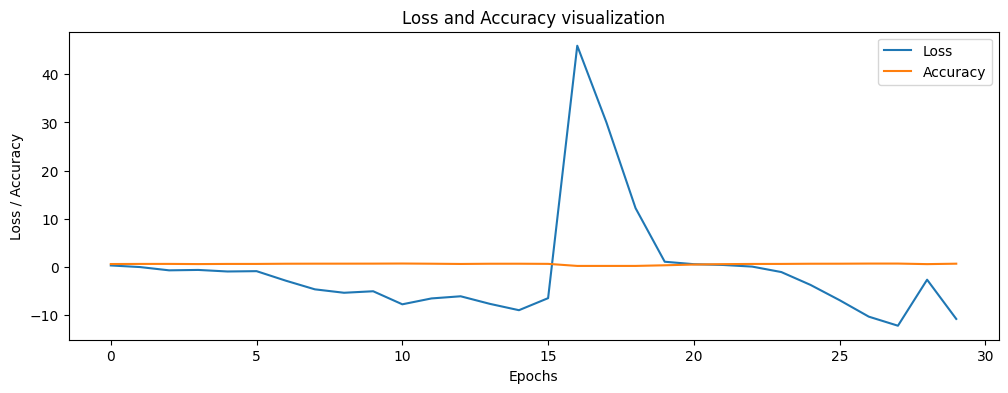

In [44]:
plt.figure(figsize=(12,4))
plt.plot(model.history.history["loss"],label="Loss")
plt.plot(model.history.history["accuracy"],label="Accuracy")
plt.title("Loss and Accuracy visualization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.show()

In [51]:
def sentiment_analyzer(text):
    text_seq =tokens.texts_to_sequences(text)
    padd_text_seq =sequence.pad_sequences(text_seq,maxlen=max_len,padding="post")
    pred = model.predict(padd_text_seq)
    sentiment = "Positive" if pred >= 0.7 else "Negative" if pred >= 0.3 else "Neutral"

    return sentiment

In [52]:
new_text =np.array(["Terrible experience – delayed flights, rude staff, and zero accountability. Avoid!"])

In [53]:
sentiment_analyzer(new_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


'Neutral'

In [54]:
sentiment_analyzer(["Exceptional service, on-time flights, friendly staff, and super comfortable seats – highly recommend!"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


'Positive'

In [55]:
sentiment_analyzer(["The flight experience was standard, with no major issues or standout features."])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


'Neutral'

In [56]:
sentiment_analyzer(["The flight was delayed, the staff was unhelpful, and the seating was uncomfortable."])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


'Negative'